# Импорт библиотек

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_csv('featured_Spotify_track_info.csv')

# Предобработка данных

In [66]:
df

,ids,names,popularity,markets,artists,release_date,duration_ms,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,musicalkey,musicalmode,time_signature,count,dates,playlists_found
0,7lznzPjPyRFdcYaD9gN7a3,This Is Shangrila,45.0,152.0,3XR64HmFo4OvexUUNW7TP0,1990-01-01,220706.0,0.004280,0.467,0.774,...,-10.617,0.0515,109.529,0.3240,4.0,0.0,4.0,1.0,2024-04-01,Grunge Forever
1,3e2fDgC93LGc9Lbdvr6I9k,River Of Deceit,52.0,185.0,0T7JQxpy1Li93vLNirbv0Z,1995-03-07,302693.0,0.111000,0.461,0.246,...,-13.487,0.0298,88.446,0.1780,0.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
2,0donjzZGsCA2PfPUA4EdMN,Shadow of the Season,46.0,185.0,3Ukr3Ufjg8ygRJv7Ww887f,1992,273813.0,0.000046,0.163,0.937,...,-5.502,0.0882,184.482,0.4130,0.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
3,3bE5slaVEfaDreqARl6k4M,Yellow Ledbetter,69.0,183.0,1w5Kfo2jwwIPruYS2UWh56,1991,303586.0,0.290000,0.504,0.354,...,-11.300,0.0339,140.870,0.2920,4.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
4,1LvJ1PFobtIm5DwzRrK0jG,Swallow My Pride,43.0,185.0,1XIIxzmo6BNRR4QkImSdsX,1990-09-13,179800.0,0.423000,0.349,0.869,...,-11.481,0.0934,127.440,0.1930,4.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15047,12Yy0hZrUebGnr3IrppPnW,Zero (J.I.D Remix),56.0,185.0,"6HvZYsbFfjnjFrWF950C9d, 6U3ybJ9UHNKEdsH7ktGBZ7",2023-06-20,224681.0,0.166000,0.690,0.770,...,-5.731,0.2310,172.020,0.6920,1.0,0.0,4.0,3.0,"2024-05-09, 2024-05-08, 2024-04-05","Spilled Ink, RapCaviar, Hip-Hop Controller"
15048,4QfikoJtCEiOj7G5R9m3sP,For Life (feat. Nile Rodgers),81.0,185.0,"23fqKkggKUBHNkbKtXEls4, 6Gk5hoM7eW8NSCYhICMDHw...",2024-04-19,175803.0,0.049400,0.571,0.791,...,-5.935,0.0741,122.085,0.5850,1.0,1.0,4.0,3.0,"2024-05-09, 2024-05-08, 2024-04-24","WOR K OUT, Singled Out, Cardio"
15049,2LP8KwtvzUx1onvXKQCoKR,WOTOWOTO SEASONING (feat. Black Sherif),69.0,183.0,"3LOm0AZjpwVQebvkyanjDy, 2LiqbH7OhqP0yuaG8VL1wJ",2023-12-01,171089.0,0.658000,0.584,0.528,...,-8.829,0.3430,102.067,0.2830,1.0,0.0,4.0,4.0,"2024-05-09, 2024-05-08, 2024-05-03","Fresh Finds Hip-Hop, Big Mood, Afro Bars"
15050,0XgbZ1n0M8FawSqTlhnW4x,JUDY (with Skilla Baby),58.0,183.0,"4r63FhuTkUYltbVAg5TQnk, 1GVenmuuAtusi17LY6FvgI",2024-05-03,186268.0,0.000638,0.792,0.775,...,-5.757,0.0658,133.993,0.6230,2.0,1.0,4.0,3.0,"2024-05-09, 2024-05-08, 2024-05-03","New Music Friday, Singled Out, Hip-Hop Controller"


Данный датасет описывает популярные треки Spotify и содержит следующие столбцы:
* ID трека
* Название трека
* Метрика популярности
* ID стран, в которых трек доступен для покупки
* ID исполнителя
* Дата выпуска
* Длительность
* Акустические/электронные инструменты
* Танцевальность
* Энергичность
* Инструментальность
* Живое исполнение
* Громкость
* Речитативность
* Темп
* Настроение
* Тональность
* Лад
* Тактовый размер
* Количество плейлистов, в которые добавлен трек
* Даты добавления
* Названия плейлистов

Большая часть предикторов связана непосредственно с мелодической и временной структурой трека, и именно их будет интересно изучить. В качестве отклика будем использовать метрику популярности. Остальные признаки нам не особо интересны, поэтому сразу их отбросим.

In [67]:
df.drop(['ids', 'names', 'markets', 'artists', 'release_date', 'count', 'dates', 'playlists_found'], axis=1, inplace=True)

Вернемся к характеристикам треков. Вполне вероятно, что некоторые из них коррелируют между собой. Построим корреляционную матрицу.

<Axes: >

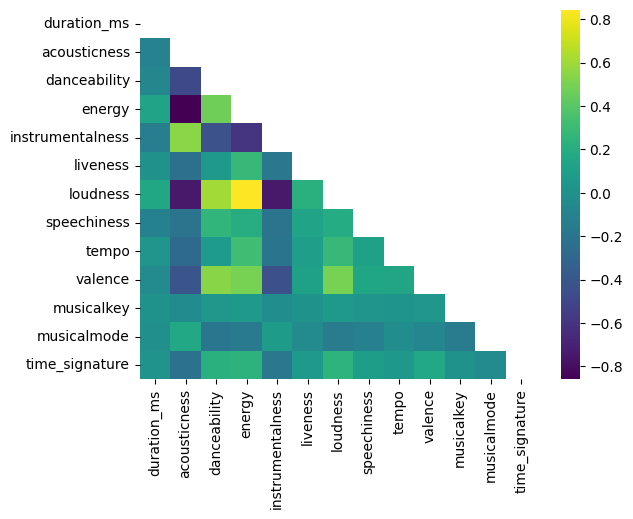

In [68]:
x = df.drop(['popularity'], axis=1)
corr = x.corr()
matrix = np.triu(corr)
sns.heatmap(corr, cmap='viridis', mask=matrix)

Исходя из матрицы видны следующие зависимости:
* Акустическая музыка имеет более грустную тональность, медленный темп, заметно меньшую громкость и энергичность, чаще бывает инструментальной.
* Инструментальная музыка обладает похожими свойствами
* Громкость тесно коррелирует с энергичностью
* Танцевальность, энергичность и громкость чаще сопряжены с позитивным настроением.
* Меньше всего с другими признаками коррелируют длительность, живое исполнение, речитативность, темп, тональность, лад и тактовый размер. Это вполне логично, поскольку слушателю не важны технические детали песни, а особенности вроде живого исполнения и речитативности относятся уже к отдельным песням, поэтому не мешают их популярности.

Чтобы не плодить сущее, избавимся от всех технических признаков.

In [69]:
df.drop(['duration_ms', 'liveness', 'speechiness', 'tempo', 'musicalkey', 'musicalmode', 'time_signature'], axis=1, inplace=True)

In [70]:
df

,popularity,acousticness,danceability,energy,instrumentalness,loudness,valence
0,45.0,0.004280,0.467,0.774,0.001340,-10.617,0.3240
1,52.0,0.111000,0.461,0.246,0.000374,-13.487,0.1780
2,46.0,0.000046,0.163,0.937,0.002970,-5.502,0.4130
3,69.0,0.290000,0.504,0.354,0.000005,-11.300,0.2920
4,43.0,0.423000,0.349,0.869,0.000000,-11.481,0.1930
...,...,...,...,...,...,...,...
15047,56.0,0.166000,0.690,0.770,0.000169,-5.731,0.6920
15048,81.0,0.049400,0.571,0.791,0.000000,-5.935,0.5850
15049,69.0,0.658000,0.584,0.528,0.005660,-8.829,0.2830
15050,58.0,0.000638,0.792,0.775,0.000005,-5.757,0.6230


Наш датасет стал гораздо меньше и содержит лишь числовые признаки. Самое время проверить пустые значения.

In [71]:
df.isnull().sum()

popularity           0
acousticness        14
danceability        14
energy              14
instrumentalness    14
loudness            14
valence             14
dtype: int64

Их немного, поэтому просто их выкинем из рассмотрения.

In [72]:
df.dropna(inplace=True)

Предиктор loudness выбивается из общего ряда, поскольку все остальные предикторы находятся в диапазоне от 0 до 1. Применим скейлинг.

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop('popularity', axis=1)
y = df.popularity
x_scaled = pd.DataFrame(scaler.fit_transform(x))
x_scaled.columns = x.columns
x_scaled

,acousticness,danceability,energy,instrumentalness,loudness,valence
0,0.004296,0.477505,0.774770,0.001347,0.760130,0.328600
1,0.111445,0.471370,0.246231,0.000376,0.704807,0.180527
2,0.000045,0.166667,0.937937,0.002985,0.858726,0.418864
3,0.291164,0.515337,0.354341,0.000005,0.746964,0.296146
4,0.424698,0.356851,0.869867,0.000000,0.743475,0.195740
...,...,...,...,...,...,...
15033,0.166666,0.705521,0.770766,0.000170,0.854312,0.701826
15034,0.049597,0.583845,0.791788,0.000000,0.850380,0.593306
15035,0.660642,0.597137,0.528519,0.005688,0.794595,0.287018
15036,0.000640,0.809816,0.775771,0.000005,0.853811,0.631846


Еще раз взглянем на корреляционную матрицу.

<Axes: >

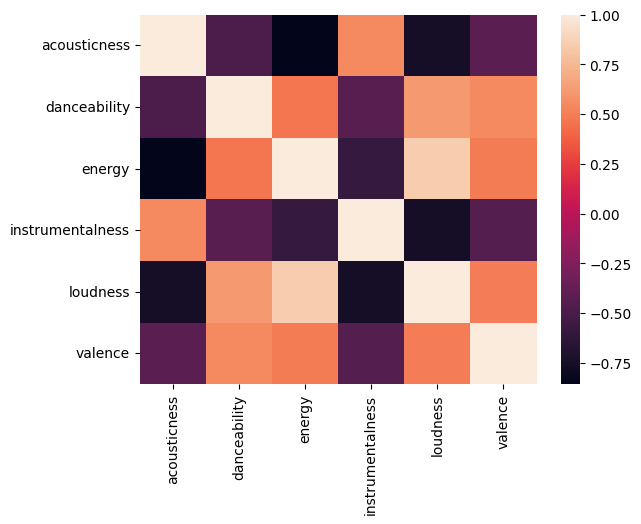

In [74]:
sns.heatmap(x_scaled.corr())

Признаки acousticness и instrumentalness имеют обратную корреляцию со многими признаками. Чтобы все показатели корреляции были положительными, заменим данные признаки на обратные.

In [75]:
x_scaled[['electronicness']] = pd.DataFrame(1 - x_scaled.acousticness)
x_scaled[['vocalness']] = pd.DataFrame(1 - x_scaled.instrumentalness)
x_scaled.drop(['acousticness', 'instrumentalness'], axis=1, inplace=True)
x_scaled

,danceability,energy,loudness,valence,electronicness,vocalness
0,0.477505,0.774770,0.760130,0.328600,0.995704,0.998653
1,0.471370,0.246231,0.704807,0.180527,0.888555,0.999624
2,0.166667,0.937937,0.858726,0.418864,0.999955,0.997015
3,0.515337,0.354341,0.746964,0.296146,0.708836,0.999995
4,0.356851,0.869867,0.743475,0.195740,0.575302,1.000000
...,...,...,...,...,...,...
15033,0.705521,0.770766,0.854312,0.701826,0.833334,0.999830
15034,0.583845,0.791788,0.850380,0.593306,0.950403,1.000000
15035,0.597137,0.528519,0.794595,0.287018,0.339358,0.994312
15036,0.809816,0.775771,0.853811,0.631846,0.999360,0.999995


# Обучение модели

Теперь перейдем к обучению модели. Для данного датасета будем решать задачу регрессии и попытаемся найти зависимость популярности от всех выбранных признаков. Разобьем датасет на обучающий и тестовый.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)

Обучим модель множественной регрессии.

In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(mean_squared_error(y_test, reg.predict(x_test)))


0.050659911135136015
309.20655037650647


Видно, что по метрикам такая модель показала очень плохой результат. Это логично, поскольку популярность необязательно должна увеличиваться при увеличении всех рассматриваемых факторов. Рассмотрим модели одиночной регрессии для каждого предиктора.

In [78]:
for column in x_scaled.columns:
    reg = LinearRegression()
    reg.fit(x_train[[column]], y_train)
    score = reg.score(x_train[[column]], y_train)
    print('Оценка для столбца', column, 'равна', score)
    mse = mean_squared_error(y_test, reg.predict(x_test[[column]]))
    print('MSE для столбца', column, 'равна', mse)

Оценка для столбца danceability равна 0.02375076620019234
MSE для столбца danceability равна 315.9896836265679
Оценка для столбца energy равна 0.01041185545076595
MSE для столбца energy равна 317.3337874398828
Оценка для столбца loudness равна 0.007062389457602292
MSE для столбца loudness равна 318.0646667643838
Оценка для столбца valence равна 0.013127695182085786
MSE для столбца valence равна 316.6667071239875
Оценка для столбца electronicness равна 0.015997631021471115
MSE для столбца electronicness равна 314.60544118048523
Оценка для столбца vocalness равна 0.020390922485466034
MSE для столбца vocalness равна 315.1907119294077


Модели одиночной регрессии также показали слабые результаты, из чего по всей работе можно сделать следующий вывод: индивидуальные показатели песен никак не влияют на их относительную популярность. Вполне закономерно, ведь у людей нет общего предпочтения по настроению прослушиваемых песен, да инастроение бывает разное. При этом сейчас гораздо популярнее прослушивание случайных песен вперемешку без учета настроения, чем собственноручный подбор трека.